In [27]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file ( zoo data CSV ) and check the data dimension

In [28]:
df_zoo = pd.read_csv('zoo.csv')

In [29]:
df_zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [30]:
df_zoo.shape

## to check the dimension using shape function
## data talks of the features of animals based on which they have a class type

(101, 18)

In [31]:
df_zoo.info()

## to match the dimesnsion with shape output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 13.8+ KB


### Q2. Drop animal_name 


In [32]:
df_zoo_new=df_zoo.drop('animal_name', axis=1)

## dropping animal name from the dataset

In [33]:
df_zoo_new.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [34]:
df_zoo_new.info()

## after removing the animal_name, columns below are validating the drop. Column with "animal name" is not showing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
hair          101 non-null int64
feathers      101 non-null int64
eggs          101 non-null int64
milk          101 non-null int64
airborne      101 non-null int64
aquatic       101 non-null int64
predator      101 non-null int64
toothed       101 non-null int64
backbone      101 non-null int64
breathes      101 non-null int64
venomous      101 non-null int64
fins          101 non-null int64
legs          101 non-null int64
tail          101 non-null int64
domestic      101 non-null int64
catsize       101 non-null int64
class_type    101 non-null int64
dtypes: int64(17)
memory usage: 13.4 KB


### Q3 Check distribution of target variable

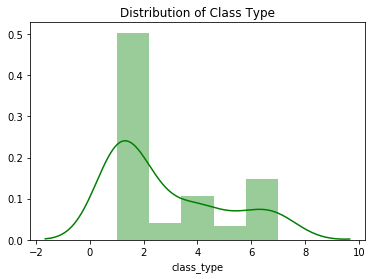

In [35]:
plt.title("Distribution of Class Type")
ax = sns.distplot(df_zoo_new["class_type"], color = 'g')

## class type is considered as target variable for the animal name based on their features given in the data
## Distribution is right skewed with 3 different peaks, we can expect atleast 3 clusters in the data

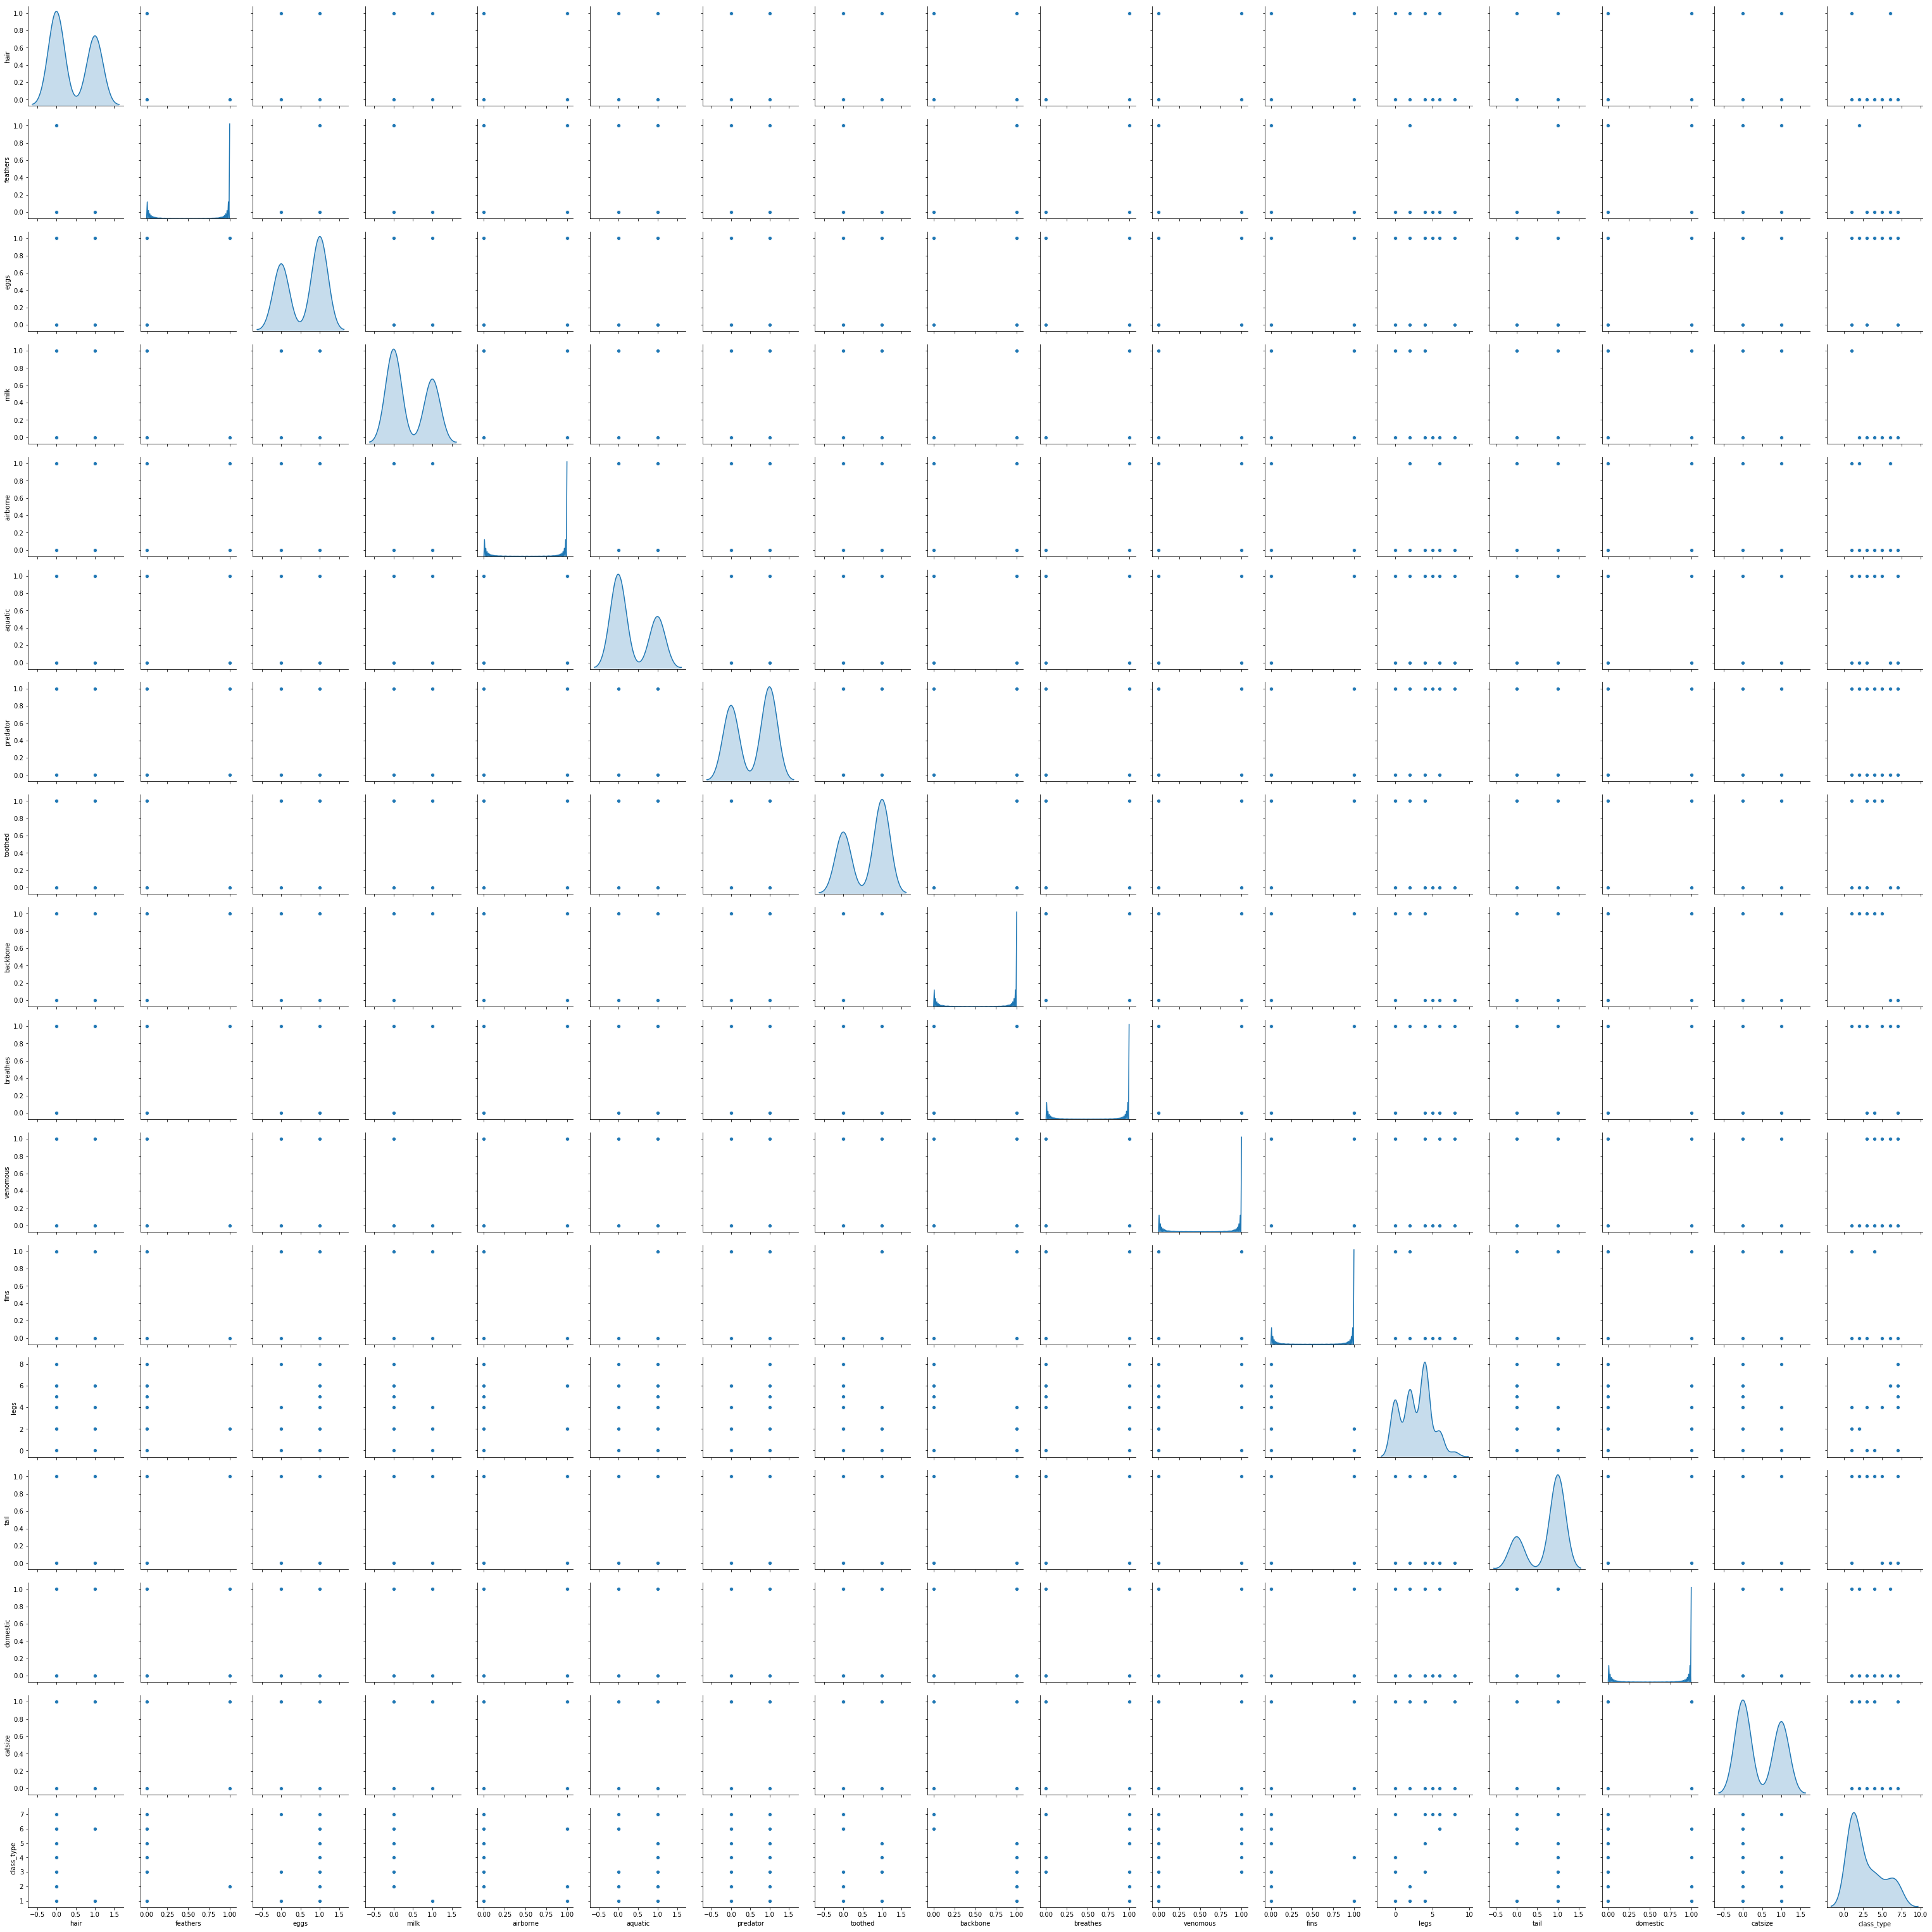

In [36]:
sns.pairplot(df_zoo_new, diag_kind='kde')

## additionally visualising all variables in the form of pair plots

In [37]:
df_zoo_new['class_type'].unique()

## there are 7 unqiue class types in the original data

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

### Q4. Check for missing values

In [38]:
df_zoo.isna().sum()

## checking the missing values in original dataframe

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [40]:
df_zoo_new.isna().sum()

## checking the missing values in new dataframe after dropping animal name 

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

### Q5. Import class file and understand the data

In [41]:
df_class = pd.read_csv('class.csv')

In [42]:
df_class.head(10)

## data is divided into 7 class numbers with number of animal species in each class number 
## class type shows the type of classes in which these animals are placed. Domain knowledge will be helpful to have greater
## insight on the class type

## there are 7 class types and class number given in the data categorizing animal names in each of the class type and 
## class number

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


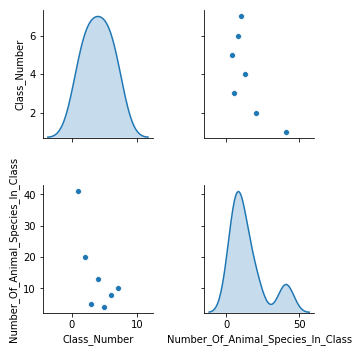

In [43]:
sns.pairplot(df_class, diag_kind='kde')

### Q6. Standardize the data 

In [44]:
from scipy import stats
from scipy.stats import zscore

In [45]:
df_zoo_new.apply(zscore)

## statndardised the data using zscore, output is shown as below

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,0.558396
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
5,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
6,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,2.601775,1.138180,-0.875451
7,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,-1.115547,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,2.601775,-0.878595,0.558396
8,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,0.558396
9,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,2.601775,-0.878595,-0.875451


### Q7. Find out the linkage matrix

In [46]:
import scipy.cluster.hierarchy as shc

In [47]:
shc.linkage(df_zoo_new.values, method='ward', metric='euclidean')

array([[  0.        ,   3.        ,   0.        ,   2.        ],
       [  1.        ,   5.        ,   0.        ,   2.        ],
       [  2.        ,   8.        ,   0.        ,   2.        ],
       [  4.        ,  10.        ,   0.        ,   2.        ],
       [ 44.        , 104.        ,   0.        ,   3.        ],
       [ 45.        , 105.        ,   0.        ,   4.        ],
       [ 47.        , 106.        ,   0.        ,   5.        ],
       [ 50.        , 107.        ,   0.        ,   6.        ],
       [ 64.        , 108.        ,   0.        ,   7.        ],
       [ 67.        , 109.        ,   0.        ,   8.        ],
       [ 69.        , 110.        ,   0.        ,   9.        ],
       [ 98.        , 111.        ,   0.        ,  10.        ],
       [ 17.        , 102.        ,   0.        ,   3.        ],
       [ 22.        , 113.        ,   0.        ,   4.        ],
       [ 28.        , 114.        ,   0.        ,   5.        ],
       [ 49.        ,  54

### Q8. Plot the dendrogram.

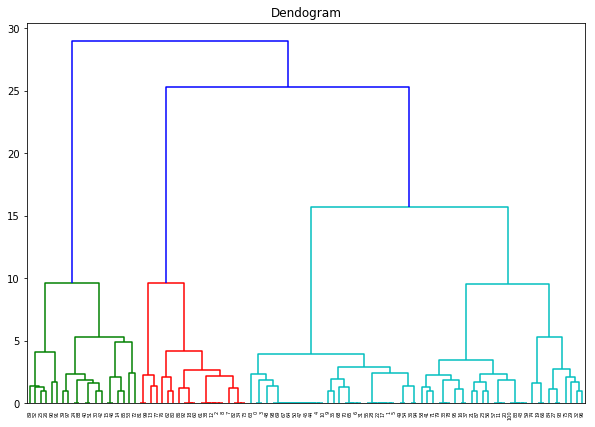

In [48]:
##plt.figure(figsize=(10,7))
##plt.title('Dendogram')
##dend = shc.dendrogram(shc.linkage(df.iloc[:,3:5].values, method='complete')
shc1=shc.linkage(df_zoo_new.values, method='ward', metric='euclidean')
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend=shc.dendrogram(shc1)

### Q9. Recreate the dendrogram for the last 4, 7, and 12 merged clusters 

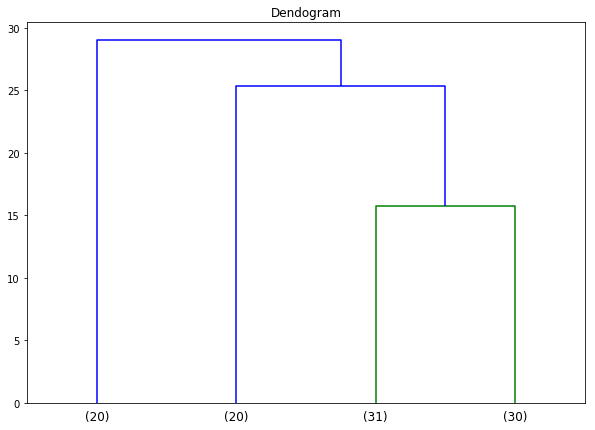

In [49]:
shc4=shc.linkage(df_zoo_new.values, method='ward', metric='euclidean',)
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend=shc.dendrogram(shc4,truncate_mode='lastp',p=4)

## recreating the dendogram for last 4 merged clusters

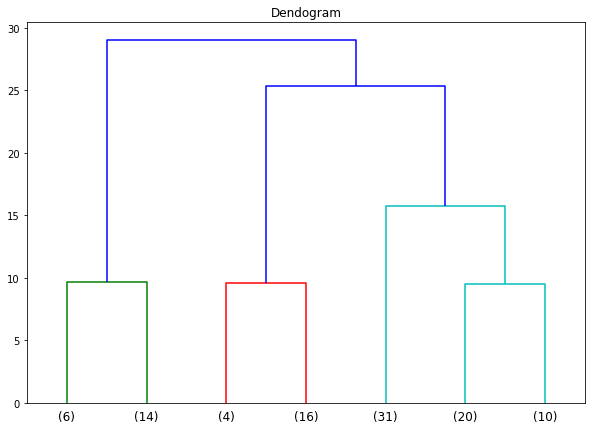

In [50]:
shc7=shc.linkage(df_zoo_new.values, method='ward', metric='euclidean',)
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend=shc.dendrogram(shc7,truncate_mode='lastp',p=7)

## recreating the dendogram for last 7 merged clusters

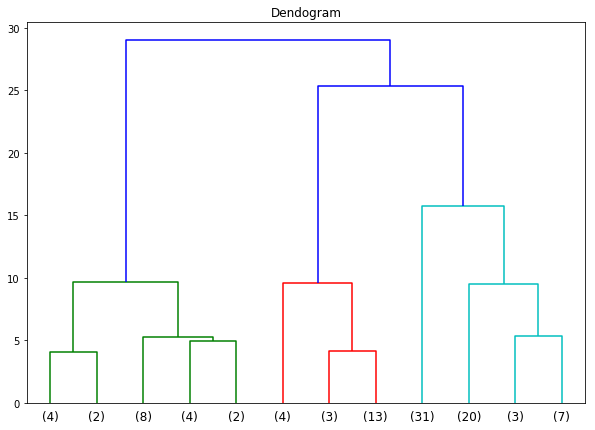

In [51]:
shc12=shc.linkage(df_zoo_new.values, method='ward', metric='euclidean',)
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend=shc.dendrogram(shc12,truncate_mode='lastp',p=12)

## recreating the dendogram for last 12 merged clusters

### Q10. select an optimum number of clusters and predict the cluster label for the scaled_data

In [62]:
from sklearn.cluster import KMeans

## used Kmeans clustering to find the optimum number of clusters and predict cluster label 

In [65]:
#Initial a list to track SSE for KMeans with different K
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(1,11):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10, max_iter=300)
    
    #Fit on the data
    km.fit(df_zoo_new)
    
    #Add cluster information for each record in dataframe
    #df_vehicle_new['k_' + str(i)] = 
    km.predict(df_zoo_new)
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]

In [66]:
df_zoo_new['labels'] = km.labels_

df_zoo_new.groupby(['labels']).count()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
labels,,,,,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
3,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
5,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
6,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [67]:
sse_df

,K,SSE
0,1.0,1144.198020
1,2.0,678.799770
2,3.0,387.105556
3,4.0,263.490580
4,5.0,213.075758
5,6.0,179.742857
6,7.0,149.166844
7,8.0,126.228002
8,9.0,112.132764
9,10.0,103.393875


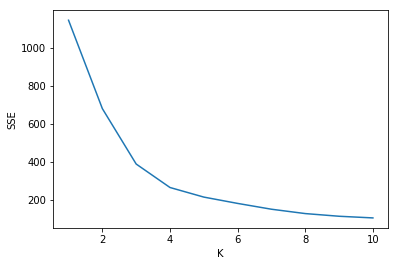

In [68]:
sns.lineplot(x='K', y='SSE', data=sse_df)

## elbow curve is plotted to find out the optimal value of K 

In [69]:
## OPTIMAL VALUE OF K IS 4 SINCE ELBOW IS SEEN AT THAT LOWEST POINT. OTHER ELBOWS IS SEEN AT 3 ALSO, WHILE OPTIMAL
## K IS 4 BEING AT THE LOWEST CURVE. 

In [70]:
km = KMeans(n_clusters=4)
km.fit(df_zoo_new)
km.predict(df_zoo_new)

## selected optimal number of clusters as 4 and predicted the labels for scaled data

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 1, 1, 1, 2, 3, 0, 1, 0, 3, 3,
       0, 3, 2, 2, 2, 3, 0, 3, 2, 0, 3, 3, 1, 0, 0, 3, 1, 2, 2, 3, 2, 3,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 3, 3, 3, 3, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 2, 1, 0, 3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3,
       2, 2, 0, 0, 1, 3, 0, 3, 3, 2, 0, 1, 3])

In [71]:
km.labels_

## selected optimal number of clusters as 4 and predicted the labels for scaled data

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 1, 1, 1, 2, 3, 0, 1, 0, 3, 3,
       0, 3, 2, 2, 2, 3, 0, 3, 2, 0, 3, 3, 1, 0, 0, 3, 1, 2, 2, 3, 2, 3,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 3, 3, 3, 3, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 2, 1, 0, 3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3,
       2, 2, 0, 0, 1, 3, 0, 3, 3, 2, 0, 1, 3])

In [100]:
from sklearn.cluster import AgglomerativeClustering

## logical number of clusters by looking at the dendogram appear to be 4 also, using agglomerative clustering also to predict
## labels 

In [102]:
ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')

In [103]:
df_zoo_new['cluster']=ac.fit_predict(df_zoo_new.values)

In [104]:
df_zoo_new.cluster.unique()

array([2, 1, 0, 3], dtype=int64)

In [108]:
df_zoo_new.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,labels,class,cluster
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,5,2,2
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,5,2,2
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,2,1,2
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,5,2,2
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,5,2,2
